In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from Ska.Matplotlib import plot_cxctime
from Ska.engarchive import fetch as fetch
from Ska.tdb import msids as msids_

In [2]:
# Plotting methods

def plot_rt_pair(rt_list, color):
    """
    """
    fig = plt.figure(figsize=(12, 5))
    alphas = (0.8, 0.2)

    for i, key in enumerate(rt_list):
        msid = msids_set[key]
        dat = hrma_cap[msid]['data']
        technical_name = hrma_cap[msid]['technical_name']
        location = hrma_cap[msid]['location']
        label = f"{technical_name}, {location}"
        dat.plot('-', label=label, color=color, alpha=alphas[i])

    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.legend()
    plt.grid(ls='dashed')
    
    
def plot_rt_difference(rt_list, color):
    """
    """
    fig = plt.figure(figsize=(12, 5))

    msids = [msids_set[rt] for rt in rt_list]
    dats = [hrma_cap[msid]['data'] for msid in msids]
    location = hrma_cap[msids[0]]['location']
    label = f'{rt_list[0]} - {rt_list[1]}'
    plot_cxctime(dats[0].times, dats[0].vals - dats[1].vals, color=color,
                 alpha=0.5, label=label)

    plt.xlabel('Time')
    plt.ylabel('Temperature difference')
    plt.legend()
    plt.grid(ls='dashed')

In [3]:
msids_.find('hrma cap')

[<MsidView msid="4OHRM08" technical_name="RT 103: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="4OHRM09" technical_name="RT 105: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="4OHRM31" technical_name="RT 101: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="4OHRM33" technical_name="RT 102: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="4OHRM52" technical_name="RT 100: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="4OHRM53" technical_name="RT 104: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="4OHRM54" technical_name="RT 106: HRMA CAP TEMP DELTA STATUS">,
 <MsidView msid="OHRTHR08" technical_name="RT 103: HRMA CAP">,
 <MsidView msid="OHRTHR09" technical_name="RT 105: HRMA CAP">,
 <MsidView msid="OHRTHR31" technical_name="RT 101: HRMA CAP">,
 <MsidView msid="OHRTHR33" technical_name="RT 102: HRMA CAP">,
 <MsidView msid="OHRTHR52" technical_name="RT 100: HRMA CAP">,
 <MsidView msid="OHRTHR53" technical_name="RT 104: HRMA CAP">,
 <MsidView msid="OHRTHR54" technical_name="RT 106: HRMA CAP">,

<img src='rt_info.png'>

<img src='IMG-2157.JPG'>

## Fetch data ##

In [4]:
msids_set = {'RT 104': 'ohrthr53', 'RT 101': 'ohrthr31',
             'RT 105': 'ohrthr09', 'RT 102': 'ohrthr33',
             'RT 106': 'ohrthr54', 'RT 103': 'ohrthr08',
             'RT 100': 'ohrthr52'}

locations = {'RT 104': 'AC Plane inner', 'RT 101': 'AC Plane outer',
             'RT 105': '-Z inner', 'RT 102': '-Z outer',
             'RT 106': '+Y/+Z inner', 'RT 103': '+Y/+Z outer',
             'RT 100': '-Y/+Z outer'}

# Fetch the data and interpolate on a common time axis

# stat, dt = None, 32.8  # 5 min samples, dt in sec
stat, dt = 'daily', 86400  # daily sample, dt in sec
dat = fetch.MSIDset(msids_set.values(), '2014:001', stat=stat)
dat.interpolate(dt=dt)
    
# Dictionary used to store the telemetry and location info
hrma_cap = {}
for msid in msids_set.values():
    hrma_cap[msid] = {}

for msid in msids_set.values():
    hrma_cap[msid]['data'] = dat[msid]
    technical_name = msids_.find(msid)[0].technical_name
    hrma_cap[msid]['technical_name'] = technical_name
    hrma_cap[msid]['location'] = locations[technical_name[:6]]

Content of the hrma_cap</code> dictionary:

In [5]:
hrma_cap.keys()

dict_keys(['ohrthr53', 'ohrthr31', 'ohrthr09', 'ohrthr33', 'ohrthr54', 'ohrthr08', 'ohrthr52'])

In [6]:
hrma_cap['ohrthr53'].keys()

dict_keys(['data', 'technical_name', 'location'])

In [7]:
hrma_cap['ohrthr53']['technical_name']

'RT 104: HRMA CAP'

In [8]:
hrma_cap['ohrthr53']['location']

'AC Plane inner'

In [9]:
hrma_cap['ohrthr53']['data'].times, hrma_cap['ohrthr53']['data'].vals

(array([5.049648e+08, 5.050512e+08, 5.051376e+08, ..., 7.365168e+08,
        7.366032e+08, 7.366896e+08]),
 array([294.27472, 294.28387, 294.27213, ..., 295.24466, 295.50278,
        295.52594], dtype=float32))

## Plot pairs #

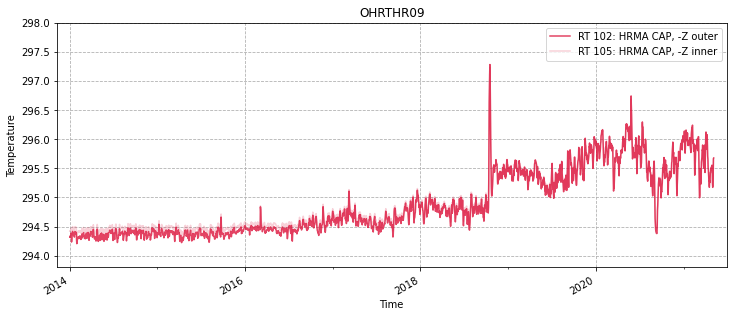

In [10]:
# Plot
plot_rt_pair(['RT 102', 'RT 105'], 'crimson')
plt.ylim(293.8, 298.0);

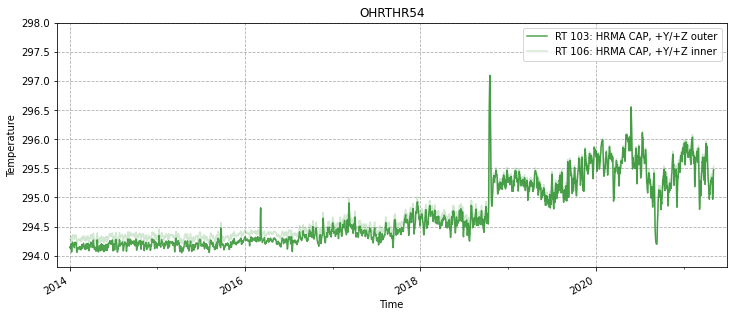

In [11]:
plot_rt_pair(['RT 103', 'RT 106'], 'forestgreen')
plt.ylim(293.8, 298);

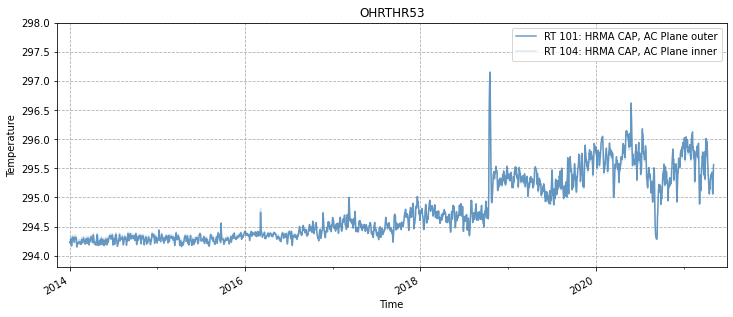

In [12]:
plot_rt_pair(['RT 101', 'RT 104'], 'steelblue')
plt.ylim(293.8, 298);

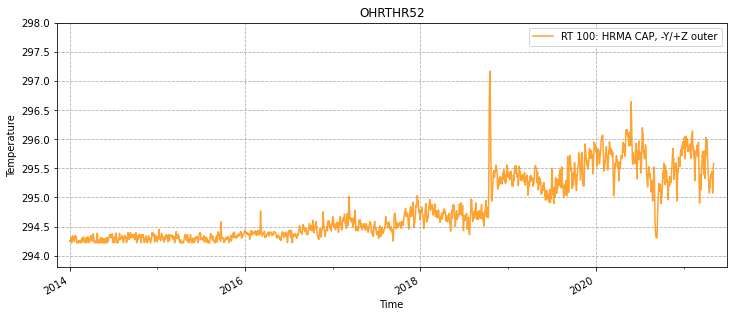

In [13]:
# Only one
plot_rt_pair(['RT 100'], 'darkorange')
plt.ylim(293.8, 298);

## Temperature differences, outer pairs ##

I am not sure what is the location of the AC Plane thermistors (they are not plotted in the diagram below) - RT 101 (OHRTHR31) and RT 104 (OHRTHR53). I see line marked as AC Plane in the image in Cell 3 but then it seems that the 101 and 104 thermistors are marked along the -Y axis.

<img src='rt_diagrams_outer.png' width='700px'>

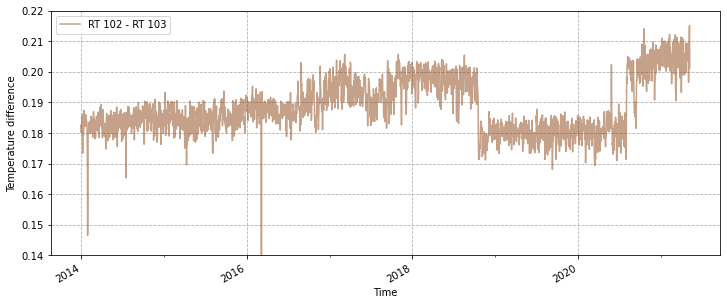

In [14]:
plot_rt_difference(['RT 102', 'RT 103'], color='saddlebrown')
plt.ylim(0.14, 0.22);

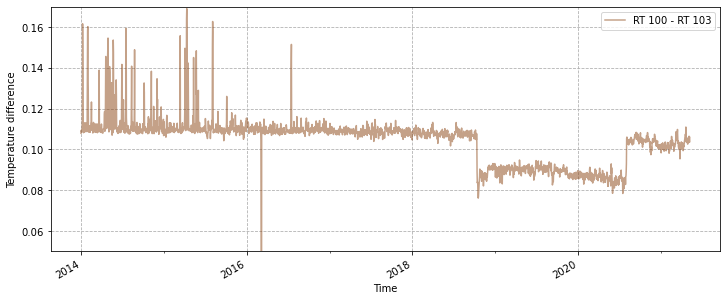

In [15]:
plot_rt_difference(['RT 100', 'RT 103'], color='saddlebrown')
plt.ylim(0.05, 0.17);

(0.02, 0.14)

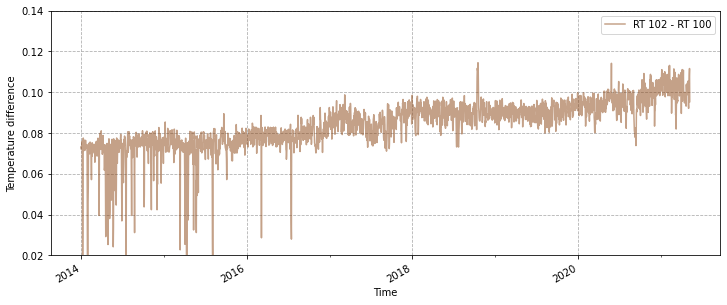

In [16]:
plot_rt_difference(['RT 102', 'RT 100'], color='saddlebrown')
plt.ylim(0.02, 0.14)

## Temperature differences, inner pairs ##

<img src='rt_diagrams_inner.png' width='700px'>

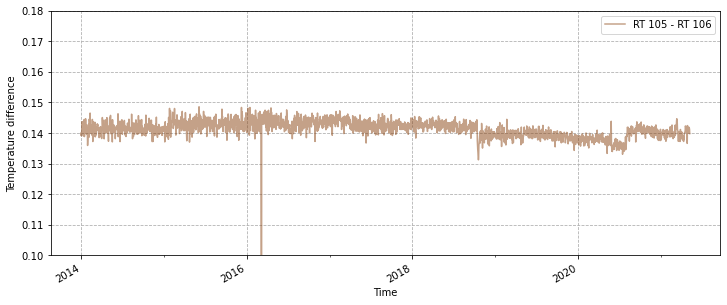

In [17]:
plot_rt_difference(['RT 105', 'RT 106'], color='saddlebrown')
plt.ylim(0.1, 0.18);

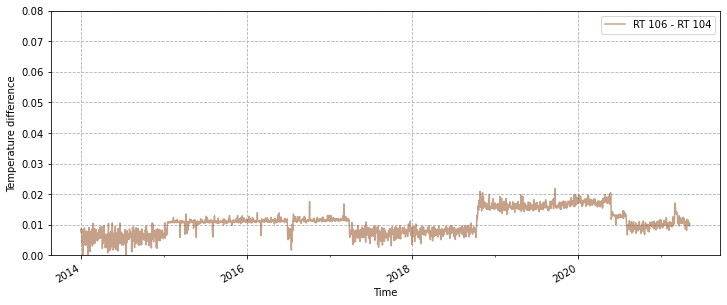

In [18]:
plot_rt_difference(['RT 106', 'RT 104'], color='saddlebrown')
plt.ylim(0.0, 0.08);

(0.1, 0.18)

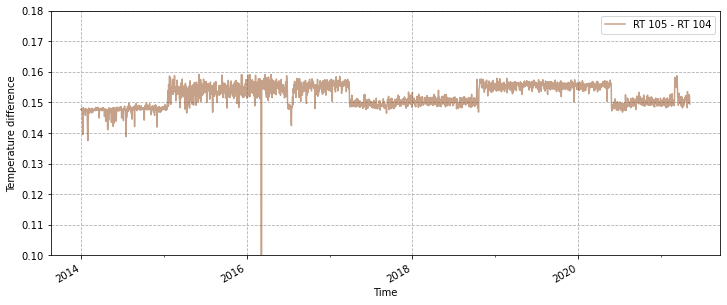

In [19]:
plot_rt_difference(['RT 105', 'RT 104'], color='saddlebrown')
plt.ylim(0.1, 0.18)

## HRMA Gradients

In [20]:
import pandas as pd
import numexpr as ne
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

t1998 = 883612730.816
def return_data(msids):
    #inputs: list of msids
    #outputs: dataframe with data and values
    msid_dict = {}
    stat, dt = 'daily', 86400  # daily sample, dt in sec
    dat = fetch.MSIDset(msids, '2014:001', stat=stat)
    dat.interpolate(dt=dt)
    for msid in msids:
        msid_dict[msid] = dat[msid].vals
    msid_tme = dat[msid].times
    msid_times = np.array(pd.to_datetime(ne.evaluate('msid_tme + t1998'),
                                            unit = 's'), dtype = 'datetime64[s]')
    msid_dict['time'] = msid_times
    return (pd.DataFrame.from_dict(msid_dict))

def plot_grad(data, y_label, plt_label, color):
    fig = plt.figure(figsize=(9, 3.5), constrained_layout=True)
    ax = fig.add_subplot()
    ax.plot(data['time'], data[y_label], label = plt_label, color = color)
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel(y_label.upper())
    #formatter for yearly ticks, major ticks every 2 years, minor every 1 yr
    fmt_2yr = mdates.YearLocator(2)
    ax.xaxis.set_major_locator(fmt_2yr)
    fmt_yr = mdates.YearLocator(1)
    ax.xaxis.set_minor_locator(fmt_yr)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    ax.grid(linestyle='--')
    plt.show()
    #return ax

The following plots and computations are based off of file update_compgradkodak.py located in /data/mta/Script/MTA_limit_trends/Scripts/Deposit/

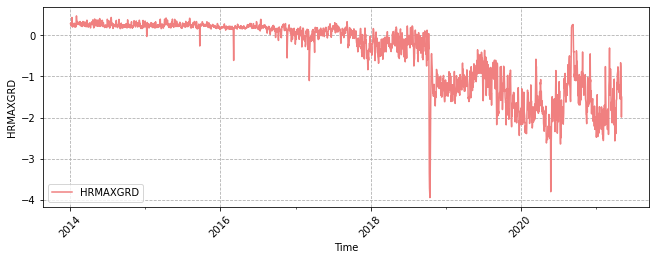

In [21]:
hrmaxgrd_dat = return_data(['ohrthr10', 'ohrthr11', 'ohrthr12', 'ohrthr13', 
                            'ohrthr34', 'ohrthr35', 'ohrthr36', 'ohrthr37',
                            'ohrthr55', 'ohrthr56', 'ohrthr57', 'ohrthr58'])
olist1 = ['ohrthr10', 'ohrthr11', 'ohrthr34', 'ohrthr35', 'ohrthr55', 'ohrthr56']
olist2 = ['ohrthr12', 'ohrthr13', 'ohrthr36', 'ohrthr37', 'ohrthr57', 'ohrthr58']
hrmaxgrd_dat['hrmaxgrd1'] = hrmaxgrd_dat[olist1].sum(axis=1)
hrmaxgrd_dat['hrmaxgrd2'] = hrmaxgrd_dat[olist2].sum(axis=1)
hrmaxgrd_dat['hrmaxgrd'] = hrmaxgrd_dat['hrmaxgrd1'] -  hrmaxgrd_dat['hrmaxgrd2']

plot_grad(hrmaxgrd_dat, 'hrmaxgrd', 'HRMAXGRD','lightcoral')

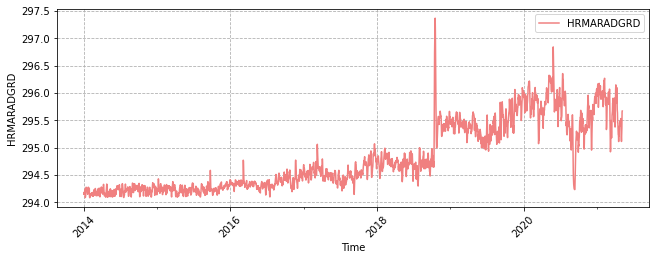

In [22]:
hrmaradgrd_dat = return_data(['ohrthr08', 'ohrthr09', 'ohrthr31', 'ohrthr33',
                         'ohrthr52', 'ohrthr53', 'ohrthr54'])
olist1 = ['ohrthr08', 'ohrthr09', 'ohrthr33', 'ohrthr52']
olist2 = ['ohrthr09', 'ohrthr53', 'ohrthr54']
hrmaradgrd_dat['hrmarad1'] = hrmaradgrd_dat[olist1].sum(axis=1)
hrmaradgrd_dat['hrmarad2'] = hrmaradgrd_dat[olist2].sum(axis=1)
hrmaradgrd_dat['hrmaradgrd'] = hrmaradgrd_dat['hrmarad1'] - hrmaradgrd_dat['hrmarad2']

plot_grad(hrmaradgrd_dat, 'hrmaradgrd', 'HRMARADGRD', 'lightcoral')

## Two point gradient computation

### Central Arpeture Plate

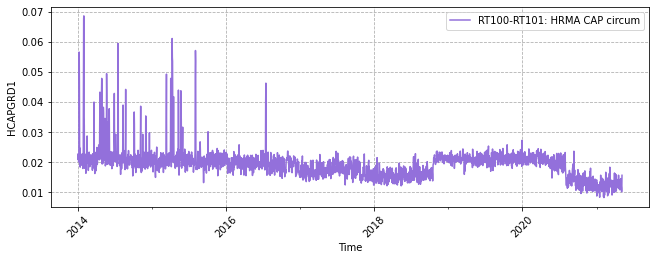

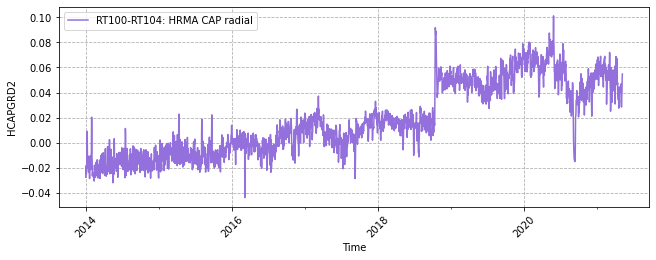

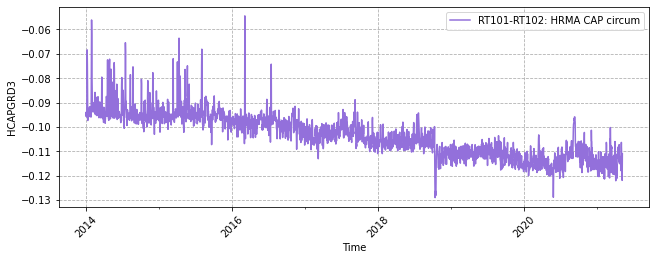

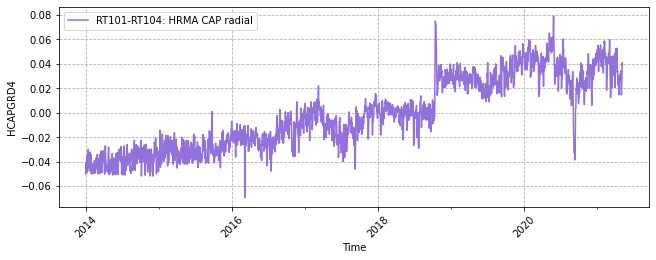

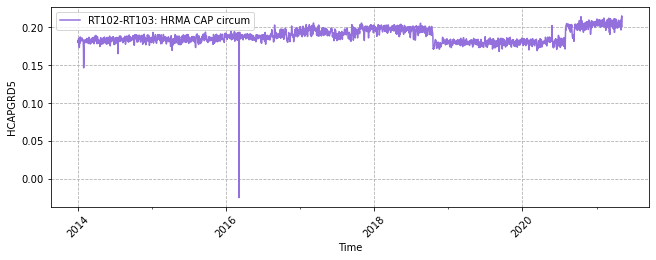

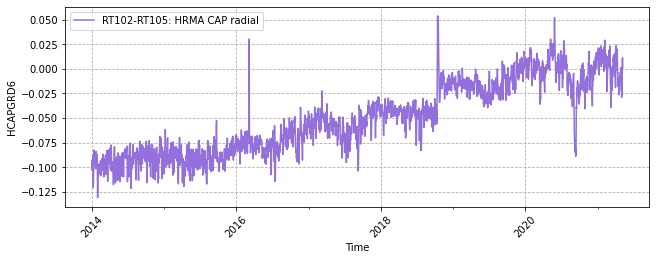

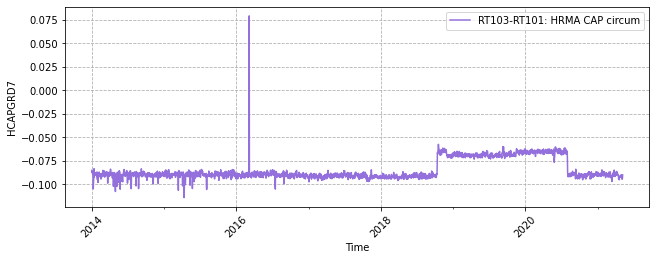

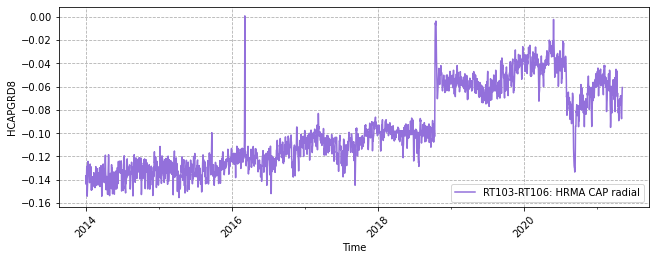

In [23]:
central_apt_plt = {'HCAPGRD1': ['RT100-RT101: HRMA CAP circum', ['OHRTHR52', 'OHRTHR31']],
                   'HCAPGRD2': ['RT100-RT104: HRMA CAP radial', ['OHRTHR52', 'OHRTHR53']],
                   'HCAPGRD3': ['RT101-RT102: HRMA CAP circum', ['OHRTHR31', 'OHRTHR33']],
                   'HCAPGRD4': ['RT101-RT104: HRMA CAP radial', ['OHRTHR31', 'OHRTHR53']],
                   'HCAPGRD5': ['RT102-RT103: HRMA CAP circum', ['OHRTHR33', 'OHRTHR08']],
                   'HCAPGRD6': ['RT102-RT105: HRMA CAP radial', ['OHRTHR33', 'OHRTHR09']],
                   'HCAPGRD7': ['RT103-RT101: HRMA CAP circum', ['OHRTHR08', 'OHRTHR31']],
                   'HCAPGRD8': ['RT103-RT106: HRMA CAP radial', ['OHRTHR08', 'OHRTHR54']]
                               }
for new_mnenomic in central_apt_plt:
    label = central_apt_plt[new_mnenomic][0]
    msids = central_apt_plt[new_mnenomic][1]
    dat = return_data(msids)
    dat[new_mnenomic] = dat[msids[0]] - dat[msids[1]]
    plot_grad(dat, new_mnenomic, label, 'mediumpurple')

### Forward Aperture Plate

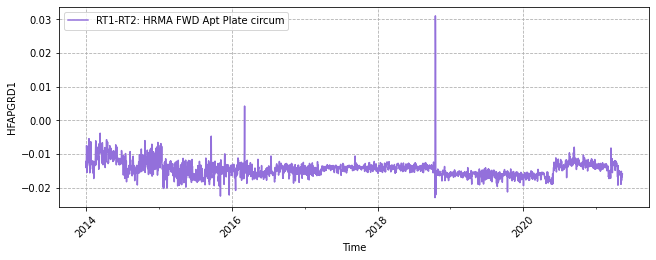

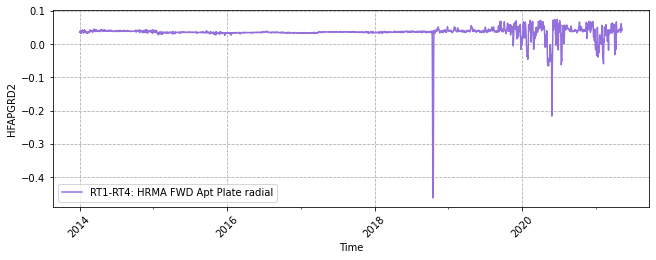

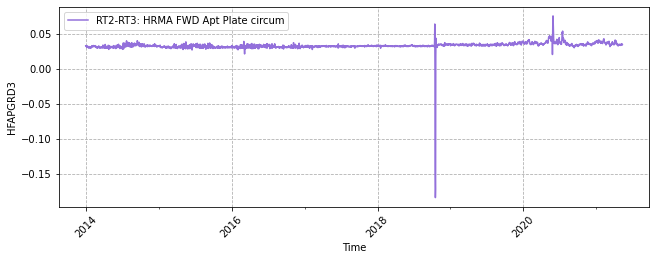

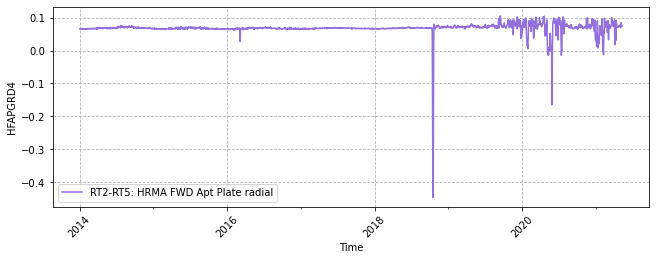

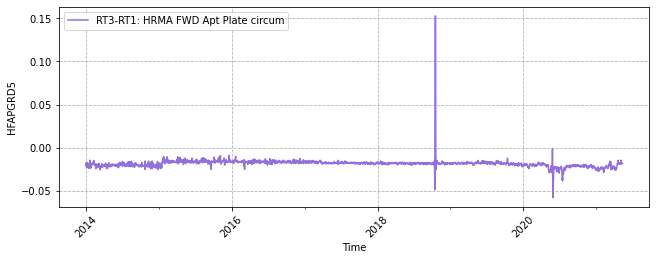

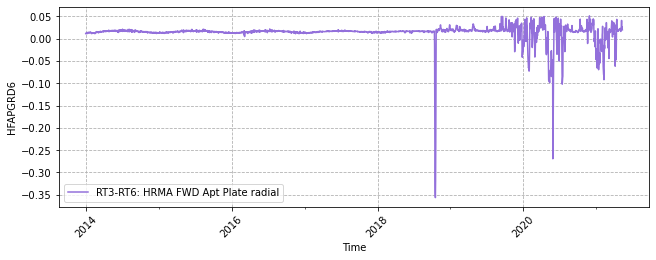

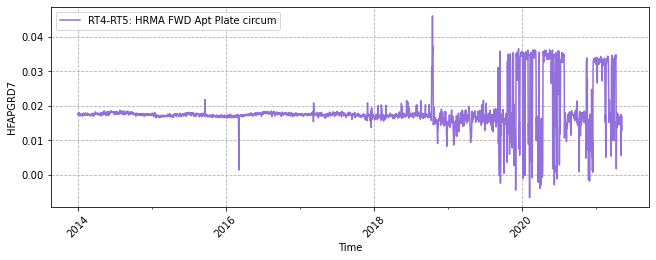

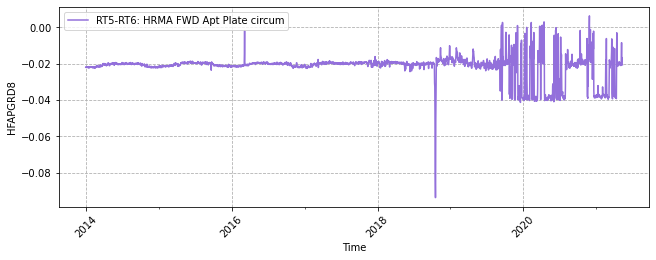

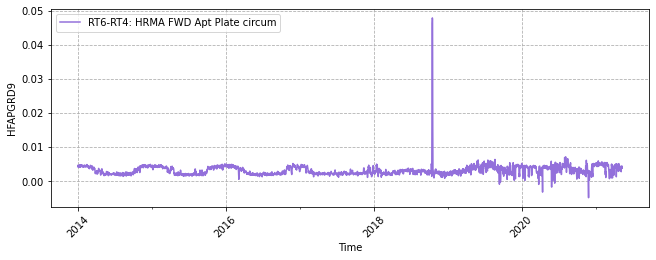

In [24]:
forward_apt_plt = {'HFAPGRD1': ['RT1-RT2: HRMA FWD Apt Plate circum', ['OHRTHR44', 'OHRTHR02']],
                   'HFAPGRD2': ['RT1-RT4: HRMA FWD Apt Plate radial', ['OHRTHR44', 'OHRTHR45']],
                   'HFAPGRD3': ['RT2-RT3: HRMA FWD Apt Plate circum', ['OHRTHR02', 'OHRTHR21']],
                   'HFAPGRD4': ['RT2-RT5: HRMA FWD Apt Plate radial', ['OHRTHR02', 'OHRTHR03']],
                   'HFAPGRD5': ['RT3-RT1: HRMA FWD Apt Plate circum', ['OHRTHR21', 'OHRTHR44']],
                   'HFAPGRD6': ['RT3-RT6: HRMA FWD Apt Plate radial', ['OHRTHR21', 'OHRTHR22']],
                   'HFAPGRD7': ['RT4-RT5: HRMA FWD Apt Plate circum', ['OHRTHR45', 'OHRTHR03']],
                   'HFAPGRD8': ['RT5-RT6: HRMA FWD Apt Plate circum', ['OHRTHR03', 'OHRTHR22']],
                   'HFAPGRD9': ['RT6-RT4: HRMA FWD Apt Plate circum', ['OHRTHR22', 'OHRTHR45']],
                               }
for new_mnenomic in forward_apt_plt:
    label = forward_apt_plt[new_mnenomic][0]
    msids = forward_apt_plt[new_mnenomic][1]
    dat = return_data(msids)
    dat[new_mnenomic] = dat[msids[0]] - dat[msids[1]]
    plot_grad(dat, new_mnenomic, label, 'mediumpurple')